In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut,LeavePOut,KFold,StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('multiple_linear_regression_dataset.csv')
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


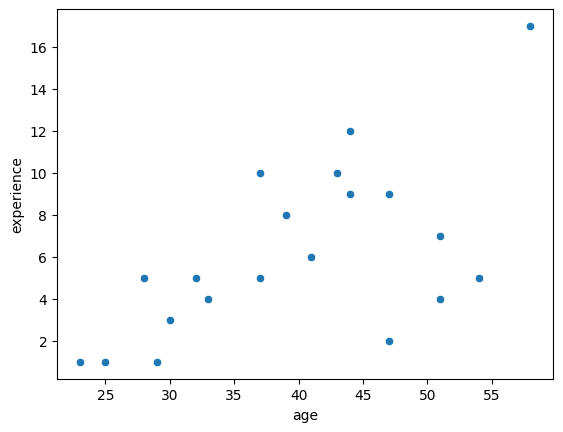

In [3]:
sns.scatterplot(x='age',y='experience',data=df)
plt.show()

In [4]:
x=df.iloc[:,:-1]
y=df['income']

In [5]:
lo=LeaveOneOut()

for train,test in lo.split(x,y):
    print(train,test)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19] [10]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] [13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19] [14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 1

In [6]:
lp=LeavePOut(p=4)

for train,test in lp.split(x,y):
    print(train,test)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]
[ 3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 4]
[ 3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 5]
[ 3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 6]
[ 3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 7]
[ 3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 8]
[ 3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19] [0 1 2 9]
[ 3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19] [ 0  1  2 10]
[ 3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [ 0  1  2 11]
[ 3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [ 0  1  2 12]
[ 3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] [ 0  1  2 13]
[ 3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19] [ 0  1  2 14]
[ 3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19] [ 0  1  2 15]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19] [ 0  1  2 16]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19] [ 0  1  2 17]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19] [ 0  1  2 18]
[ 3 

In [7]:
kf=KFold(n_splits=10)

for train,test in kf.split(x,y):
    print(train,test)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1]
[ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [2 3]
[ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [4 5]
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 19] [6 7]
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 17 18 19] [8 9]
[ 0  1  2  3  4  5  6  7  8  9 12 13 14 15 16 17 18 19] [10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 16 17 18 19] [12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17 18 19] [14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19] [16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19]


In [12]:
c=cross_val_score(LinearRegression(),x,y,cv=KFold(n_splits=10))
c.sort()
c*100

array([-17.49226984,  35.5767375 ,  64.36383371,  92.11081542,
        92.5189329 ,  92.94145316,  94.05005184,  95.65157466,
        98.75944105,  99.64513878])

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(93.87098237077886, 97.41213876189155)

In [19]:
dict={
    'fit_intercept':[True],
    'copy_X': [True],
    'n_jobs': [None],
    'positive': [False]
}
gd=GridSearchCV(LinearRegression(),param_grid=dict)
gd.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [None], 'positive': [False]})

In [15]:
gd.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [17]:
gd.best_score_*100

np.float64(91.70478962846344)